# Black Scholes
# 05/2/2021
# Jon Tammaro and David Hulett

# What is the Black-Scholes Model?
* The Black-Scholes model is an equation used to solve for options prices
* The Black Scholes model is only used to price European options as it does not take into account that U.S. options could be exercised before the expiration date
* The Black-Scholes model requires five input variables: the strike price of an option (what price the option can be sold at), the current stock price, the time to expiration, the risk-free rate, and the volatility

# Description of the Solution Procedure
* We are going to define a variable so it can take all five of the inputs at the same time and give us a option price.  We used the Black Scholes equation for this.

* We then are going to look into each separate input of the Black Scholes equation and see how it effects the option price

* Lastly, we are going to run a random walk using the Black Scholes model reflecting what it would be like with real data

# Assumptions in the Black Scholes Model

* No dividends are paid out during the life of the option.
* The volatility of the stock and the risk-free rate are known and constant.
* The option is European and can only be exercised at expiration.

# Code for Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
from scipy import log,exp,sqrt,stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random
import math

* S = Current Market Price
* X = Strike Price
* r = Risk-Free Interest Rate
* sigma = Volatility of Asset
* T = Time to Maturity

$C = N * d_{1} * X - N * d_{2} * K * e^{-rt}$

$d_{1} = \frac{ln\frac{S}{K}+(r+\frac{\sigma}{2}*t)}{\sigma\sqrt{t}}$

$d_{2} = d_{1} - \sigma\sqrt{t}$

In [2]:
def BS_Call_Exact(S,X,r,sigma,T):

    d1 = (np.lib.scimath.log(S/X)+(r+((sigma**2)/2))*(T))/(sigma*np.lib.scimath.sqrt((T)))
    d2 = d1-sigma*np.lib.scimath.sqrt((T))
    
    CO = S*stats.norm.cdf(d1) - X*np.exp(-r*(T))*stats.norm.cdf(d2)
    
    return CO

# How change in the Strike Price effects the option price

From the graphs we are going to be able to see the option prices change differently for the different inputs into the Black Scholes model.  We ran an iteration for the Strike Price, Risk-Free Interest Rate, Volatility of the Asset and the Time to Maturity holding the current market price at $110.

We first ran the strike price from \$10-\$220 and we were able to see the curve where from the price \$10-\$100 it is almost perfectly straight. Then from \$100-\$220 it is exponential growing to the left.

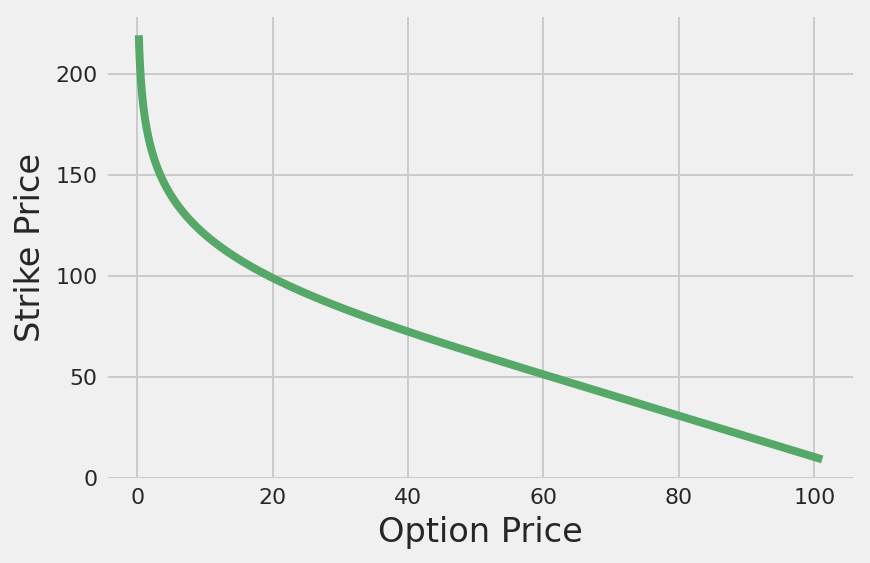

To look into the linear part of the graph we then ran the strike price from \$10-\$110 to get the slope of the line.  
It was -1.109

When strike price is below \$110 the option price decreases at almost the same rate as the strike price increases.


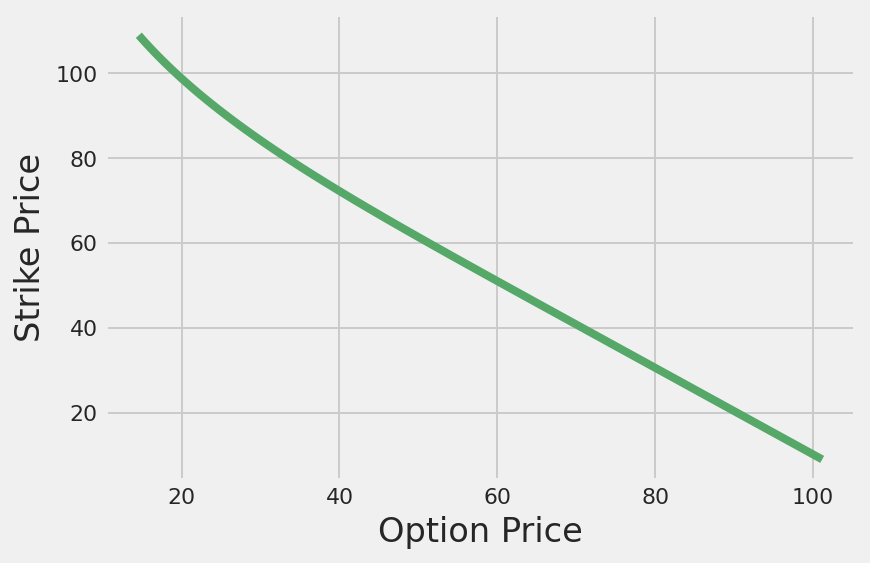

# How change in the Risk-Free Interest Rate affects the option price

Risk-free interest rate is linear for any rate.  Slope is around 11.5 for any range of the risk free interest rate


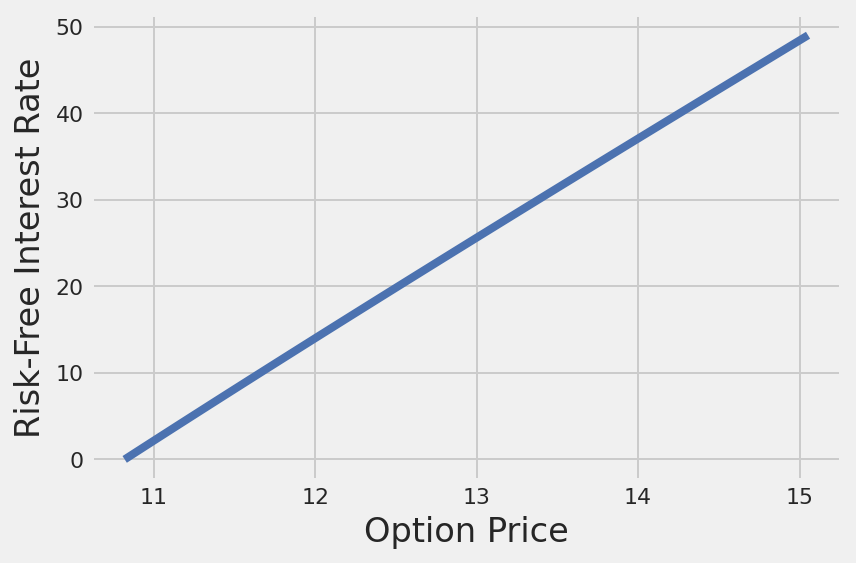

# How change in the Volatility affects the option price

For the volatility from 0-40% we see a horizontal line from 0-18% then it curves to the right(increasing option price) and it is almost linear above 18%


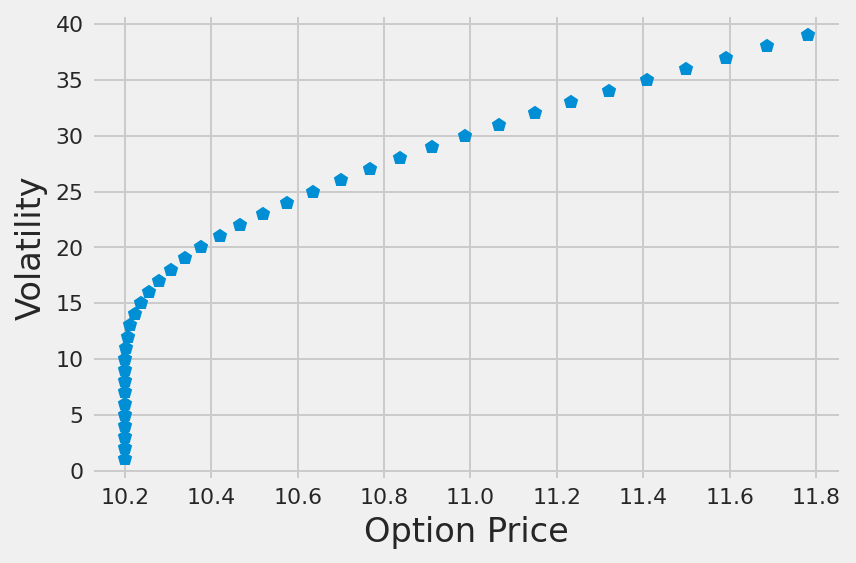

We zoomed in on the volatility from 25%-40% to see the linear relationship of volatility and the option price.

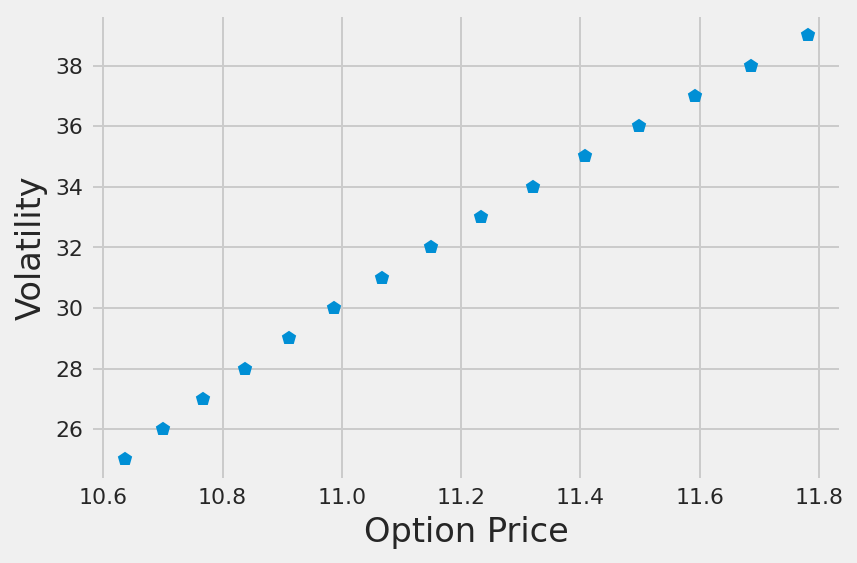

Divide r by 100 so it is calculating an increase in the risk-free interest rate by a percent at a time

The risk free rate is normally around 1-2% 


# How change in the Time to Maturity affects the option price

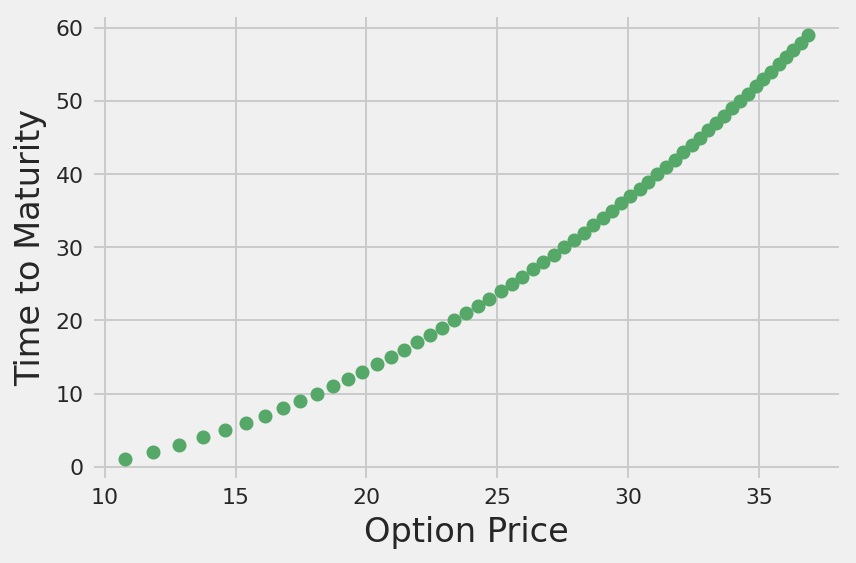

Divide T by 12 so it is calculating an increase in the time to experation by month



# Problems with the Black-Scholes Model
* The model assumes dividends and risk-free rates are constant, but this may not be true in reality
* The model assumes volatility remains constant over the option's life.  This is not true because volatility fluctuates with the level of supply and demand
* There are no transaction costs or taxes factored into the Black Scholes Model which is not realistic
* Uses volatility as a known constant in the equation, but volatility is impossible to know in the future. You have to calculate Implied Volatility
* Implied volatility of a stock is the market's forecast of a likely movement in the stock's price
* High volatility means a large price swing, but the price could go up or down or fluctuate between the two directions

Pseudocode for random walk:

    prices = []

    define function price(length of time, old price, volitility):
        while c < (length of time):
            rnd = random number between 0 and 1 ##percent change
            change amount = rnd * old price
            new price = old price +- change amount
            c = c+1
            append prices list with new price
            old price = new price
        return new price


In [3]:
sigma = .02
old_price = 12
days = 25
strike = 15
interest = .03
CDF = .8

price = []
counter = []
def prices(iterations,old_price,sigma):
    c = 0
    while c<iterations:
        rnd = random.random() ## generate number, 0 <= x < 1.0
        change_percent = 2 * sigma * rnd
        if (change_percent > sigma):
            change_percent -= (2 * sigma)
        change_amount = old_price * change_percent
        new_price = old_price + change_amount
        price.append(new_price)
        counter.append(c)
        c += 1
        old_price = new_price
    #plt.plot(counter,price)
    #plt.plot(0,0)
    #plt.show()
    return new_price


prices(days,old_price,sigma)


12.702149652550816

In [4]:
def d1(S,X,T,r,sigma):
    d1 = (np.log(S/X)+(r+(sigma**2/2))*T)/(sigma * math.sqrt(T))
    return d1

def d2(S,X,T,r,sigma):
    d2 = d1(S,X,T,r,sigma)-sigma * math.sqrt(T)
    return d2

def call_price(N,d1,d2,S,r,T):
    C = (N*d1*S) - (N*d2*math.exp(-r*T))
    return C


In [5]:
S = prices(days, old_price,sigma)
d_1 = d1(S,strike,days,interest,sigma)
d_2 = d2(S,strike,days,interest,sigma)
call_price(CDF,d_1,d_2,S,interest,days)


67.38227586763549

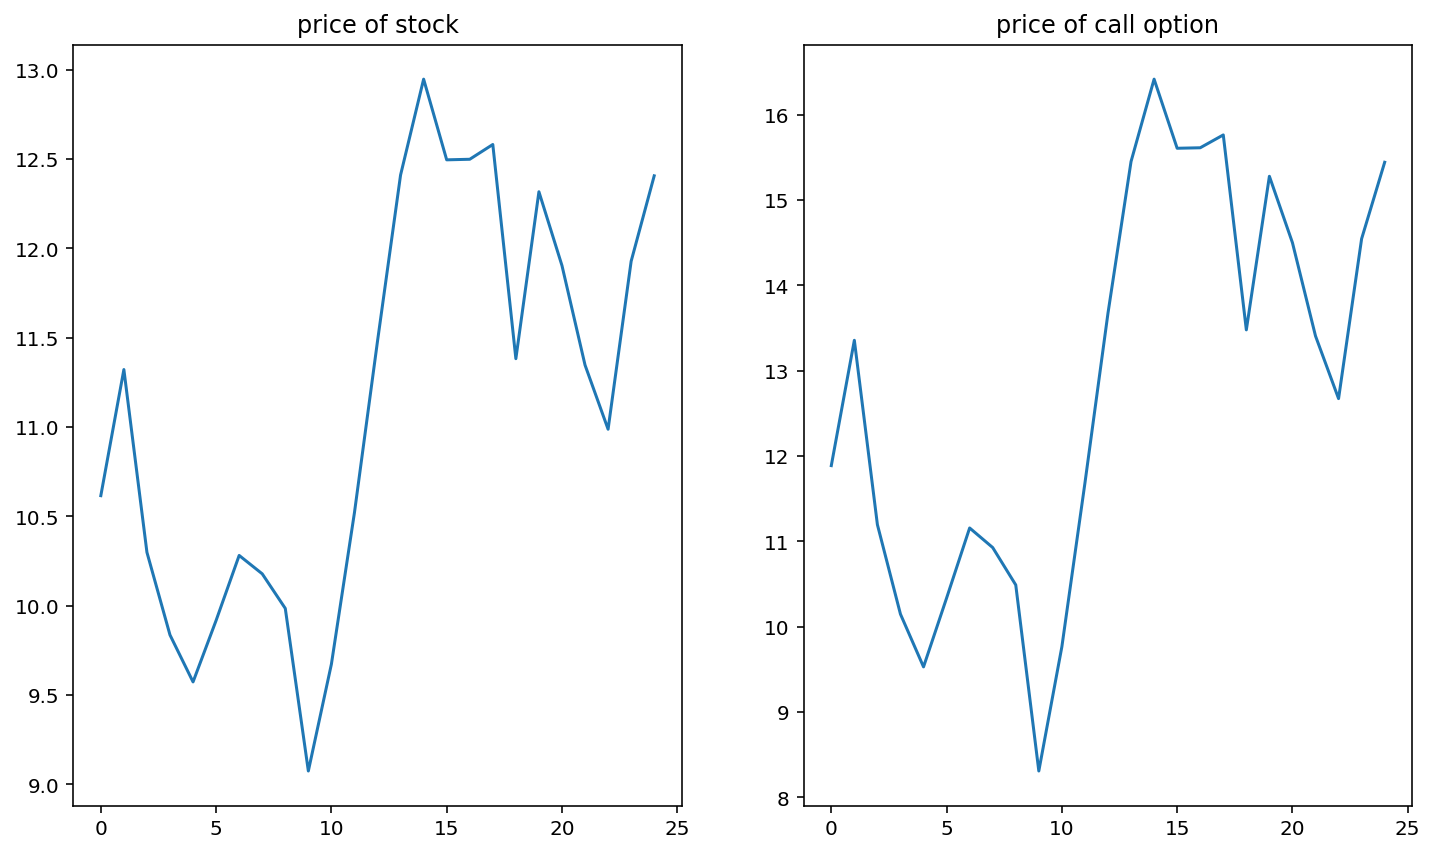

In [6]:
sigma = random.random()/10
old_price = (random.random()+1)*10
days = 25
strike = old_price + random.random()*10
interest = random.random()/10
CDF = random.random()

price = []
S = prices(days, old_price,sigma)
d_1 = d1(S,strike,days,interest,sigma)
d_2 = d2(S,strike,days,interest,sigma)
call_price(CDF,d_1,d_2,S,interest,days)


callP = []
for a in price:
    d_1 = d1(a,strike,days,interest,sigma)
    d_2 = d2(a,strike,days,interest,sigma)
    C = call_price(CDF,d_1,d_2,S,interest,days)
    callP.append(C)

plt.subplot(1,2,1)
plt.plot(range(days),price)
plt.title('price of stock')
plt.subplot(1,2,2)
plt.plot(range(days),callP)
plt.title('price of call option')
plt.show()



# Difficulties
In the beginning of the project we had to do a lot of initial research to familiarize ourselves with the Black Scholes model so we both truly understood how it worked.

Our main struggle with our project was finding real data to use for the Black Scholes code.  Because we were unable to find data online and use it in our coded Black Scholes model we produced code that would simulate the Black Scholes with real data.

# Honor Pledge
* Description: David
* Black Scholes equation: David and Jon
* Code for iteration through different inputs: David
* Pseudo code for random walk: Jon
* Random walk Code: Jon

Jon Tammaro David Hulett

# Code

In [7]:
Xlist = []
Xiterationpricelist = []
for X in range(9,220):
    Xiterationprice = (BS_Call_Exact(110,X,.02,.3,1))
    Xlist.append(X)
    Xiterationpricelist.append(Xiterationprice)

In [8]:
Xlist = []
Xiterationpricelist = []
for X in range(9,110):
    Xiterationprice = (BS_Call_Exact(110,X,.02,.3,1))
    Xlist.append(X)
    Xiterationpricelist.append(Xiterationprice)

In [0]:
plt.plot(Xiterationpricelist,Xlist,'g')
plt.xlabel('Option Price')
plt.ylabel('Strike Price')

In [0]:
linregress(Xiterationpricelist,Xlist)

In [0]:
rlist = []
riterationpricelist = []
for r in range(0,50):
    riterationprice = (BS_Call_Exact(110,100,r/100,.3,.1))
    rlist.append(r)
    riterationpricelist.append(riterationprice)

In [0]:
plt.plot(riterationpricelist,rlist,'b')
plt.xlabel('Option Price')
plt.ylabel('Risk-Free Interest Rate')

In [0]:
linregress(riterationpricelist,rlist)

In [0]:
sigmalist = []
sigmaiterationpricelist = []
for sigma in range(1,40):
    sigmaiterationprice = (BS_Call_Exact(110,100,.02,sigma/100,.1))
    sigmalist.append(sigma)
    sigmaiterationpricelist.append(sigmaiterationprice)

In [0]:
sigmalist = []
sigmaiterationpricelist = []
for sigma in range(25,40):
    sigmaiterationprice = (BS_Call_Exact(110,100,.02,sigma/100,.1))
    sigmalist.append(sigma)
    sigmaiterationpricelist.append(sigmaiterationprice)

In [0]:
plt.plot(sigmaiterationpricelist,sigmalist,'p')
plt.xlabel('Option Price')
plt.ylabel('Volatility')

In [0]:
linregress(sigmaiterationpricelist,sigmalist)

In [0]:
Tlist = []
Titerationpricelist = []
for T in range(1,60):
    Titerationprice = (BS_Call_Exact(110,100,.02,.3,T/12))
    Tlist.append(T)
    Titerationpricelist.append(Titerationprice)

In [0]:
plt.plot(Titerationpricelist,Tlist,'go')
plt.xlabel('Option Price')
plt.ylabel('Time to Maturity')

In [38]:
linregress(Titerationpricelist,Tlist)

LinregressResult(slope=2.338536375598195, intercept=-31.922047537903794, rvalue=0.9878640680377826, pvalue=8.459091629319392e-48, stderr=0.04870117295409776, intercept_stderr=1.3362996660846387)